In [475]:
%matplotlib inline

import sqlite3
import pandas as pd #for data frames
import numpy as np #numpy array operations
import nltk #natural lang processing, for processing text
import string
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import pickle
import seaborn as sn

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [476]:
# Load the dataset
df = pd.read_csv('TINPLATE.NS.csv')

In [477]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev Close
0,09-05-2016,64.95,66.80,64.25,66.30,63.89,153984.0,64.25
1,10-05-2016,66.50,66.50,65.45,65.85,63.46,58608.0,66.30
2,11-05-2016,64.95,66.90,64.45,66.40,63.99,104557.0,65.85
3,12-05-2016,66.40,68.05,66.00,67.75,65.29,157628.0,66.40
4,13-05-2016,66.00,67.35,66.00,66.60,64.18,35010.0,67.75


In [478]:
import datetime
'''df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)
'''
#df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') 
#df.head()

'''x = datetime.datetime.strptime('20-11-2002','%d-%m-%Y').strftime('%d%m%Y')
int(x)'''

for i in range(0,len(df)):
    df['Date'][i]=int(datetime.datetime.strptime(str(df['Date'][i]),'%d-%m-%Y').strftime('%d%m%Y'))

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [479]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev Close
0,9052016,64.95,66.80,64.25,66.30,63.89,153984.0,64.25
1,10052016,66.50,66.50,65.45,65.85,63.46,58608.0,66.30
2,11052016,64.95,66.90,64.45,66.40,63.99,104557.0,65.85
3,12052016,66.40,68.05,66.00,67.75,65.29,157628.0,66.40
4,13052016,66.00,67.35,66.00,66.60,64.18,35010.0,67.75


In [480]:
# total data frame as X matrix
#x = np.array(df.iloc[:,0:])

x = np.array(df[['Open','High','Low']])

# Output i.e Closing Values as Y matrix
y = np.array(df['Close'])

In [481]:
x_1 = x[0:430]
y_1 = y[0:430]

x_test = x[430:]
y_test = y[430:]

In [482]:
#x_1, x_test, y_1, y_test = cross_validation.train_test_split(x,y, test_size=0.3, random_state=0)

In [483]:
#y_1=y_1.astype(float)
#y_1

## k-fold Cross Validation

In [490]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import neighbors

def k_fold_cross_validation(x_mat,y_vec):
    li = list(range(0,30))
    
    #creating odd list of vals for 'k'
    neighbor = list(filter(lambda x: x%2 != 0,li))

    #empty list to hold CV scores/accuracy
    cv_scores = []

    
        # perform 10-fold cross validation
    for k in neighbor:
        knn =neighbors.KNeighborsRegressor(k)
        scores = cross_val_score(knn, x_1, y_1, cv=10, scoring='mean_squared_error')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbor[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)

    # plot misclassification error vs k 
    plt.plot(neighbor, MSE)

    for xy in zip(neighbor, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    print('*********************************************************************')
    print("optimal k value is: ",optimal_k)
    return optimal_k;

# k-fold Cross Validation Using Time Based Split

In [491]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import neighbors

def k_fold_cross_validation_usingTimeSplit(x_mat,y_vec):
    li = list(range(0,30))
    
    #creating odd list of vals for 'k'
    neighbor = list(filter(lambda x: x%2 != 0,li))

    #empty list to hold CV scores/accuracy
    cv_scores = []

    
    #performing k-fold cross validation with Times Based Split
    for k in neighbor:
        #knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',n_jobs=-1)
        knn = neighbors.KNeighborsRegressor(k)
        #knn.fit(x_1,y_1)
        tscv = TimeSeriesSplit(n_splits=10)
        acc_sum=0
        cnt=0
        for train_index, test_index in tscv.split(x_1):
            X_train, X_test = x_1[train_index], x_1[test_index]
            Y_train, Y_test = y_1[train_index], y_1[test_index]
            
            #print(X_train)
            #print(Y_train)
            
            knn.fit(X_train,Y_train)
            #pred = knn.predict(X_test)
            
            #this function doesnt work for regression its noly for classification
            #acc = accuracy_score(Y_test, pred, normalize=True )*float(100)
            
            # knn.score() function internally predicts and gives the scores its used for Regression Not for Classification
            acc = knn.score(X_test,Y_test)
            acc_sum=acc_sum+acc
            cnt=cnt+1
        cv_scores.append(acc_sum/cnt)
            
            
   
    # determining best k
    optimal_k = neighbor[cv_scores.index(max(cv_scores))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)

    # plot misclassification error vs k 
    plt.plot(neighbor, cv_scores)

    for xy in zip(neighbor, np.round(cv_scores,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Accuracy Percentage')
    plt.show()

    print("the Accuracy for each k value is : ", np.round(cv_scores,3))
    print('*********************************************************************')
    print("optimal k value is: ",optimal_k)
    return optimal_k;

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Dell\Anaconda3\lib\site-pac


The optimal number of neighbors is 5.


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Dell\Anaconda3\lib\site-pac

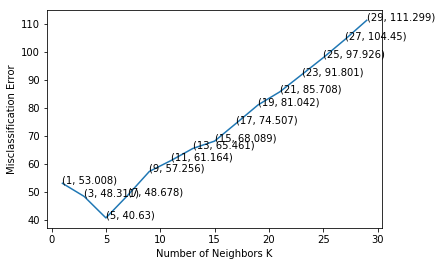

the misclassification error for each k value is :  [ 53.008  48.311  40.63   48.678  57.256  61.164  65.461  68.089  74.507
  81.042  85.708  91.801  97.926 104.45  111.299]
*********************************************************************
optimal k value is:  5


In [492]:
optim_k_val = k_fold_cross_validation(x_1,y_1)

In [493]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(optim_k_val)

In [494]:
knn.fit(x_1,y_1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [495]:
pred = knn.predict(x_test)

In [496]:
x_test_close = np.array(df['Close'][430:])

In [497]:
for i in range(0,len(x_test)):
    print("actual",x_test_close[i], " pred: ",pred[i])

actual 264.75  pred:  270.53999999999996
actual 253.35  pred:  252.76
actual 257.35  pred:  253.34999999999997
actual 235.15  pred:  239.01000000000005
actual 232.4  pred:  230.45999999999998
actual 222.55  pred:  233.76
actual 228.4  pred:  230.43
actual 240.6  pred:  237.08
actual 241.1  pred:  237.08
actual 248.15  pred:  248.25
actual 243.95  pred:  249.26
actual 244.65  pred:  249.26
actual 238.35  pred:  239.26999999999998
actual 233.0  pred:  230.21999999999997
actual 233.05  pred:  230.42999999999998
actual 232.05  pred:  230.42999999999998
actual 228.4  pred:  230.43
actual 234.55  pred:  230.43
actual 238.85  pred:  233.38000000000002
actual 236.1  pred:  232.38000000000002
actual 232.75  pred:  230.43
actual 230.6  pred:  230.43
actual 223.75  pred:  232.34
actual 220.1  pred:  230.45999999999998
actual 206.65  pred:  233.76
actual 201.55  pred:  200.14
actual 202.65  pred:  200.14
actual 206.9  pred:  208.38000000000002
actual 213.5  pred:  227.32000000000002
actual 212.65 

In [498]:
'''for i in range(0,len(x_test)):
    for j in range(0,len(df)):
        if(df['Date'][j] == x_test[i][0]):
            act_price = df['Close'][j]
        
    
    print("Date: ", x_test[i][0], " Actual: ",act_price," Pred:", pred[i])'''

'for i in range(0,len(x_test)):\n    for j in range(0,len(df)):\n        if(df[\'Date\'][j] == x_test[i][0]):\n            act_price = df[\'Close\'][j]\n        \n    \n    print("Date: ", x_test[i][0], " Actual: ",act_price," Pred:", pred[i])'

In [499]:
acc_score=0;
for i in range(0,len(x_test)):
    if(abs(x_test_close[i] - pred[i]) <= 4):
        acc_score=acc_score+1
print((acc_score/len(x_test))*100)

50.0
